<a href="https://colab.research.google.com/github/sabumjung/Machine-Learning-Algorithm/blob/master/ch13_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#잠재 의미 분석

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from nltk.corpus import brown

from scipy.linalg import svd

from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
 import nltk
 nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [0]:
# For reproducibility
np.random.seed(1000)

In [0]:
def scatter_documents(X):
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))

    ax.scatter(X[:, 0], X[:, 1])
    ax.set_xlabel('t0')
    ax.set_ylabel('t1')
    ax.grid()
    plt.show()

In [0]:
# Compose a corpus
sentences = brown.sents(categories=['news'])[0:500]
corpus = []

for s in sentences:
    corpus.append(' '.join(s))

In [0]:
# Vectorize the corpus
vectorizer = TfidfVectorizer(strip_accents='unicode', stop_words='english', sublinear_tf=True, use_idf=True)
Xc = vectorizer.fit_transform(corpus).todense()

In [0]:
# Perform SVD
U, s, V = svd(Xc, full_matrices=False)

In [0]:
# Extract a sub-space with rank=2
rank = 2

Uk = U[:, 0:rank]
sk = np.diag(s)[0:rank, 0:rank]
Vk = V[0:rank, :]

In [15]:
# Check the top-10 word per topic
Mwts = np.argsort(np.abs(Vk), axis=1)[::-1]

for t in range(rank):
    print('\nTopic ' + str(t))
    for i in range(10):
        print(vectorizer.get_feature_names()[Mwts[t, i]])


Topic 0
plainfield
wasn
basketball
captain
team
football
letterman
james
signal
patrolman

Topic 1
plainfield
wasn
released
copy
allies
clash
absence
circumstances
nightmare
troubles



Sample document:
The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced `` no evidence '' that any irregularities took place .

Sample document in the topic sub-space:
d0 = 0.15*t1 + -0.12*t2


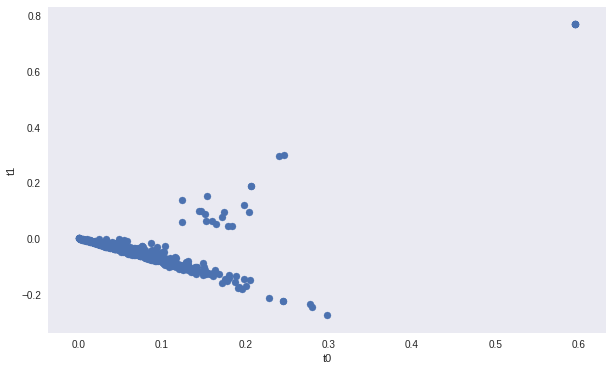

In [16]:
# Compute the structure of a document
print('\nSample document:')
print(corpus[0])

Mdtk = Uk.dot(sk)
print('\nSample document in the topic sub-space:')
print('d0 = %.2f*t1 + %.2f*t2' % (Mdtk[0][0], Mdtk[0][1]))

# Show a scatter plot of all documents
scatter_documents(Mdtk)